# Library

In [1]:
import sys, os
import matplotlib
import scipy.io, numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
import matplotlib as mpl
mpl.rcParams['font.size'] = 12

In [2]:
cd /data/keeling/a/yicenl2/c/git/project/partmc/scenarios

/data/nriemer/c/yicenl2/git/project/partmc/scenarios


# γ_ca ≈ γ_pr

## Read Data

In [3]:
directory = 'sce_completed/scenarios'
gamma_pop = np.zeros((2,100,25))
chi = np.zeros((2, 100,25))

#Bulk properties, define index
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("urban_plume_process.nc" in filename):
            sce_ind      =  int(filename[-30:-27])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, sce_ind, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, sce_ind, :] = ncf.variables["gamma_pop_comp"].data
            chi[0,sce_ind, :] = ncf.variables["chi"].data
            
gamma_pop_error = (gamma_pop[1,:,:].ravel() - 
                   gamma_pop[0,:,:].ravel())/gamma_pop[0,:,:].ravel()
error_2d = (gamma_pop[1,:,:] - gamma_pop[0,:,:])/gamma_pop[0,:,:]
d = {"gamma_pop_pr": gamma_pop[0,:,:].ravel(),
     "gamma_pop_comp": gamma_pop[1,:,:].ravel(),
     "gamma_pop_error": gamma_pop_error * 100,
     "chi": chi[0,:,:].ravel()}
df = pd.DataFrame(data=d)
df_subset = df[(np.abs(df["gamma_pop_pr"] - 0.01) < 1e-3)&
               (np.abs(df["gamma_pop_error"]) < 10)]
case_index = df_subset.index.values
sce_index  = (case_index/25).astype(int)
hour_index = case_index % 25

## NO3_dist

In [4]:
directory = 'sce_completed/scenarios'
no3_dist = np.zeros((2,100,25,50,180))
#scenarios/scenario_0038/out/urban_plume_00000021_process.nc
#Make plots
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("urban_plume_00000" in filename):
        #for i in range (34):
            #s = r'scenarios/' + 'scenario_' + str(sce_index[i]).zfill(4) + '/out' + r'/' + 'urban_plume_0000' + str(hour_index[i]).zfill(4) + '_process.nc'
            #if s in filename:
                #i = int(filename[-13:-11]) - 1
            t_index = int(filename[-13:-11]) - 1
            case_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            no3_dist[0, case_index, t_index,:,:] = ncf.variables["diam_no3_dist_pr"].data * 1e-6
            no3_dist[1, case_index, t_index,:,:] = ncf.variables["diam_no3_dist_avg"].data * 1e-6

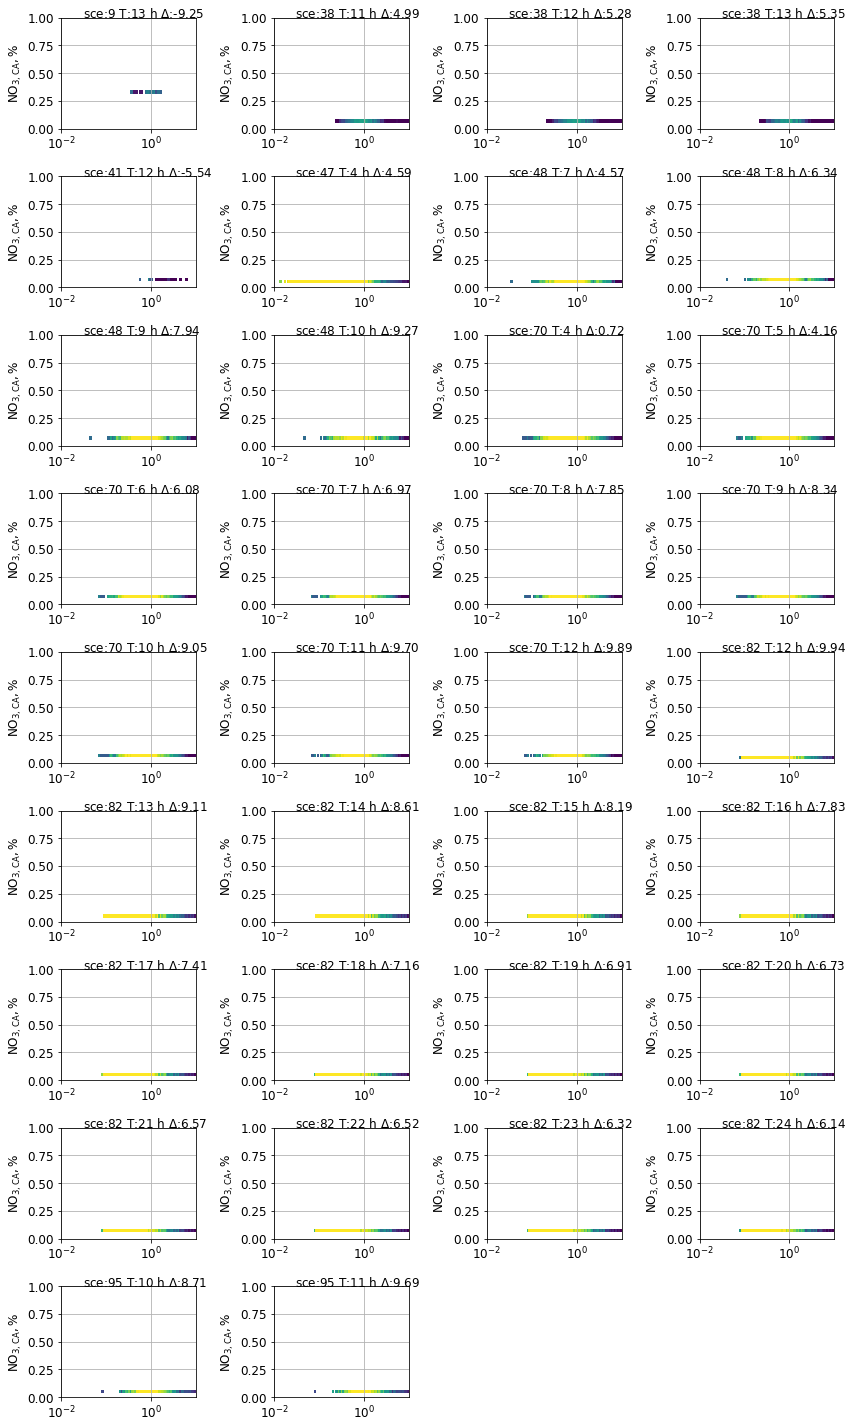

In [5]:
plt.figure(figsize=(12,20))
X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(34):
    plt.subplot(9,4,i+1)
    p = plt.pcolormesh(X, Y, no3_dist[1, sce_index[i],hour_index[i],:,:], 
                       norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    
    plt.xlim(1e-2,1e1)
    #plt.xlabel(r'Dry diameter $D_{\rm dry}$ / $\rm \mu m$')
    plt.xscale('log')

    plt.ylim(0,1)
    plt.ylabel(r'${\rm NO_{3,CA}}, \% $')
    plt.yscale('linear')
    plt.text(0.03, 1, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], hour_index[i], 
                                           error_2d[sce_index[i],hour_index[i]]*100))
    
    plt.grid(True)
    #cbar = plt.colorbar(p, format=mpl.ticker.LogFormatterMathtext(),orientation='vertical')
    #cbar.set_label(r'Number conc. n$(D_{\rm dry}$, $\gamma)$ / $\rm cm^{-3}$')

plt.tight_layout()
#plt.savefig('2D_no3_frac_CA.png')

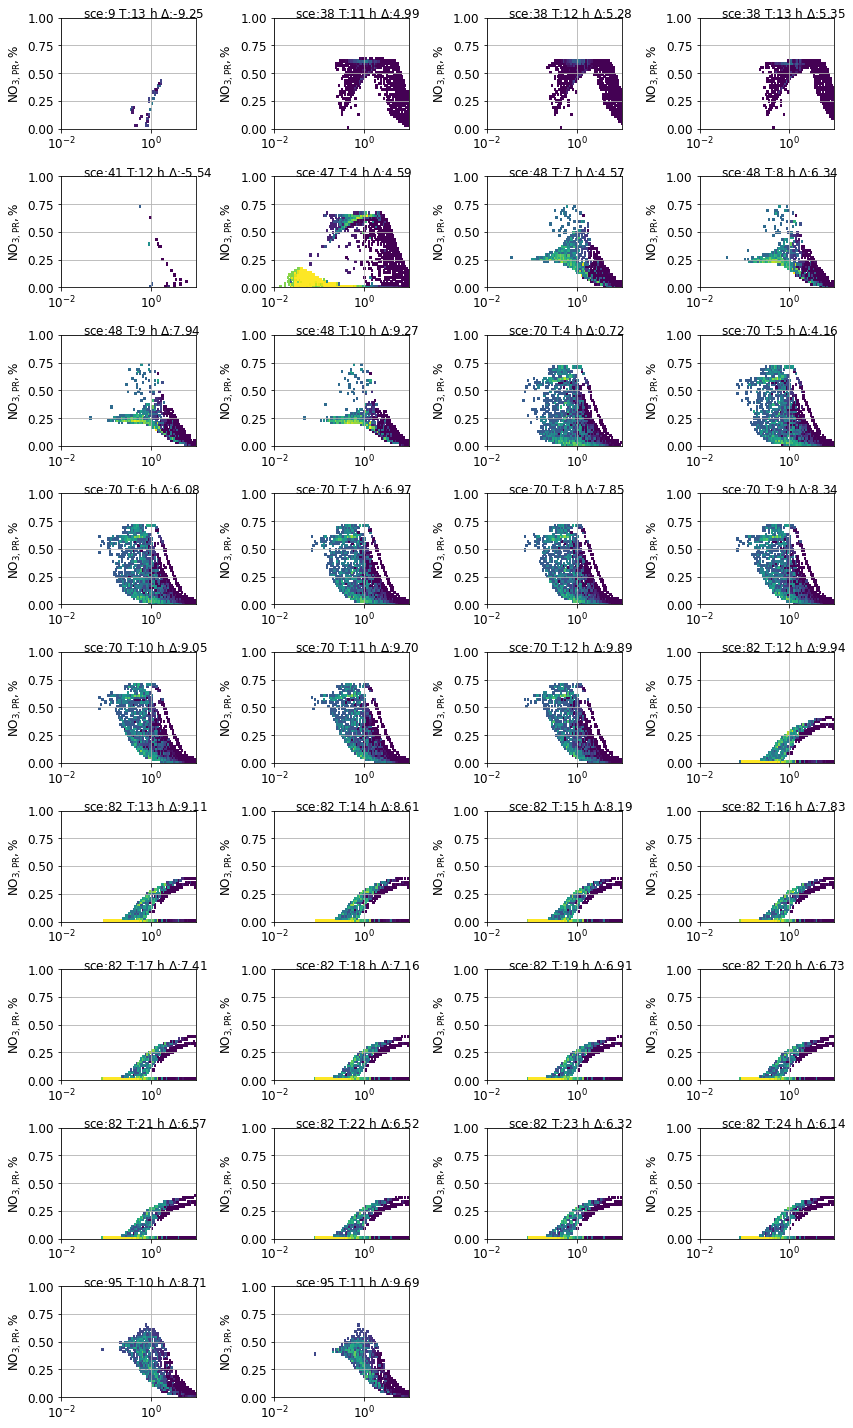

In [6]:
plt.figure(figsize=(12,20))
X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(34):
    plt.subplot(9,4,i+1)
    p = plt.pcolormesh(X, Y, no3_dist[0, sce_index[i],hour_index[i],:,:], 
                       norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    
    plt.xlim(1e-2,1e1)
    #plt.xlabel(r'Dry diameter $D_{\rm dry}$ / $\rm \mu m$')
    plt.xscale('log')

    plt.ylim(0,1)
    plt.ylabel(r'${\rm NO_{3,PR}}, \% $')
    plt.yscale('linear')
    plt.text(0.03, 1, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], hour_index[i], 
                                           error_2d[sce_index[i],hour_index[i]]*100))
    
    plt.grid(True)
    #cbar = plt.colorbar(p, format=mpl.ticker.LogFormatterMathtext(),orientation='vertical')
    #cbar.set_label(r'Number conc. n$(D_{\rm dry}$, $\gamma)$ / $\rm cm^{-3}$')

plt.tight_layout()
#plt.savefig('2D_no3_frac_CA.png')

## SO4_dist

In [7]:
directory = 'sce_completed/scenarios'
so4_dist = np.zeros((2,100,25,50,180))
#scenarios/scenario_0038/out/urban_plume_00000021_process.nc
#Make plots
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("urban_plume_00000" in filename):
        #for i in range (34):
            #s = r'scenarios/' + 'scenario_' + str(sce_index[i]).zfill(4) + '/out' + r'/' + 'urban_plume_0000' + str(hour_index[i]).zfill(4) + '_process.nc'
            #if s in filename:
                #i = int(filename[-13:-11]) - 1
            t_index = int(filename[-13:-11]) - 1
            case_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            so4_dist[0, case_index, t_index,:,:] = ncf.variables["diam_so4_dist_pr"].data * 1e-6
            so4_dist[1, case_index, t_index,:,:] = ncf.variables["diam_so4_dist_avg"].data * 1e-6

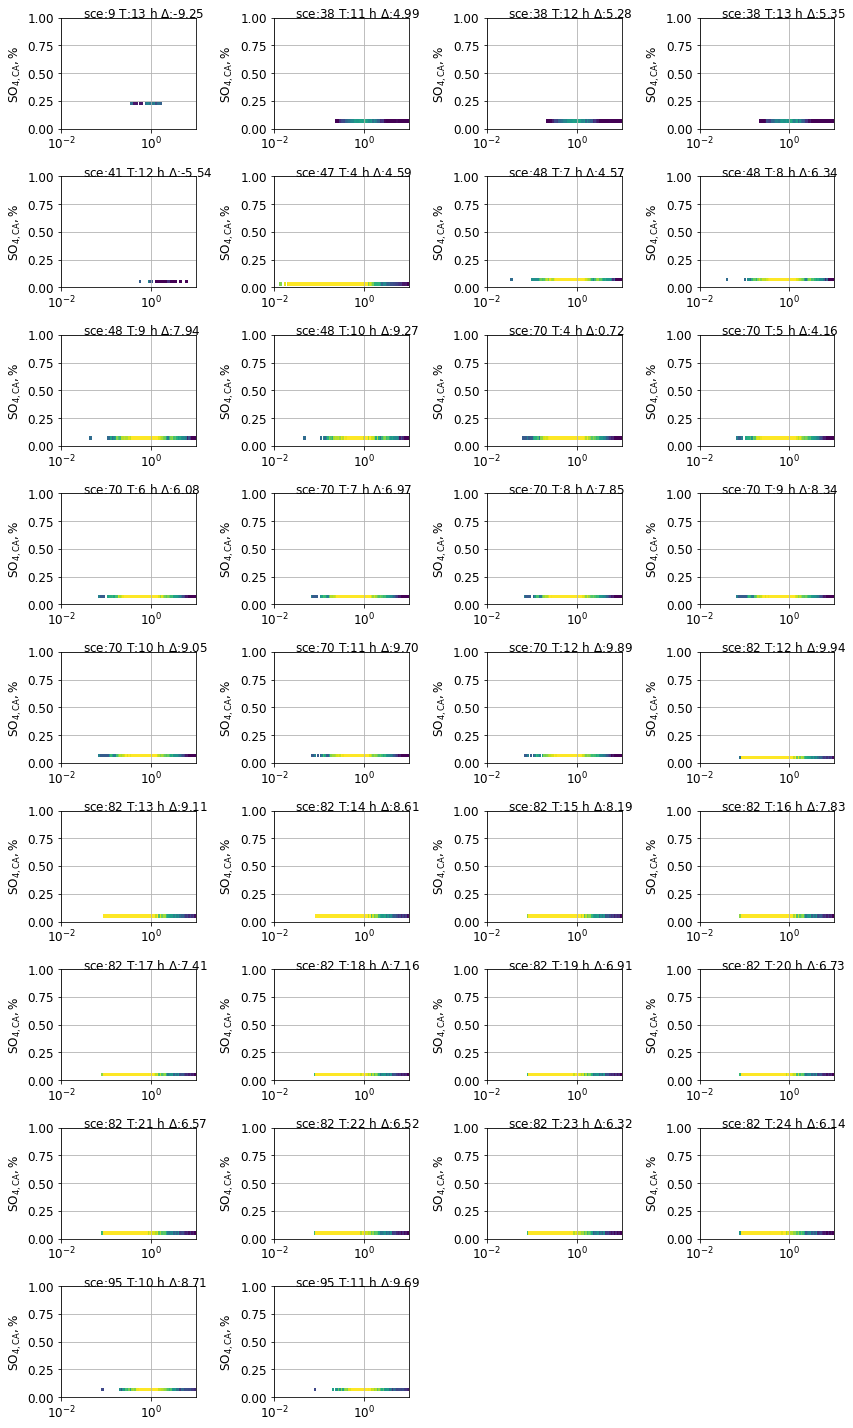

In [8]:
plt.figure(figsize=(12,20))
X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(34):
    plt.subplot(9,4,i+1)
    p = plt.pcolormesh(X, Y, so4_dist[1, sce_index[i],hour_index[i],:,:], 
                       norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    
    plt.xlim(1e-2,1e1)
    #plt.xlabel(r'Dry diameter $D_{\rm dry}$ / $\rm \mu m$')
    plt.xscale('log')

    plt.ylim(0,1)
    plt.ylabel(r'${\rm SO_{4,CA}}, \% $')
    plt.yscale('linear')
    plt.text(0.03, 1, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], hour_index[i], 
                                           error_2d[sce_index[i],hour_index[i]]*100))
    
    plt.grid(True)
    #cbar = plt.colorbar(p, format=mpl.ticker.LogFormatterMathtext(),orientation='vertical')
    #cbar.set_label(r'Number conc. n$(D_{\rm dry}$, $\gamma)$ / $\rm cm^{-3}$')

plt.tight_layout()
#plt.savefig('2D_no3_frac_CA.png')

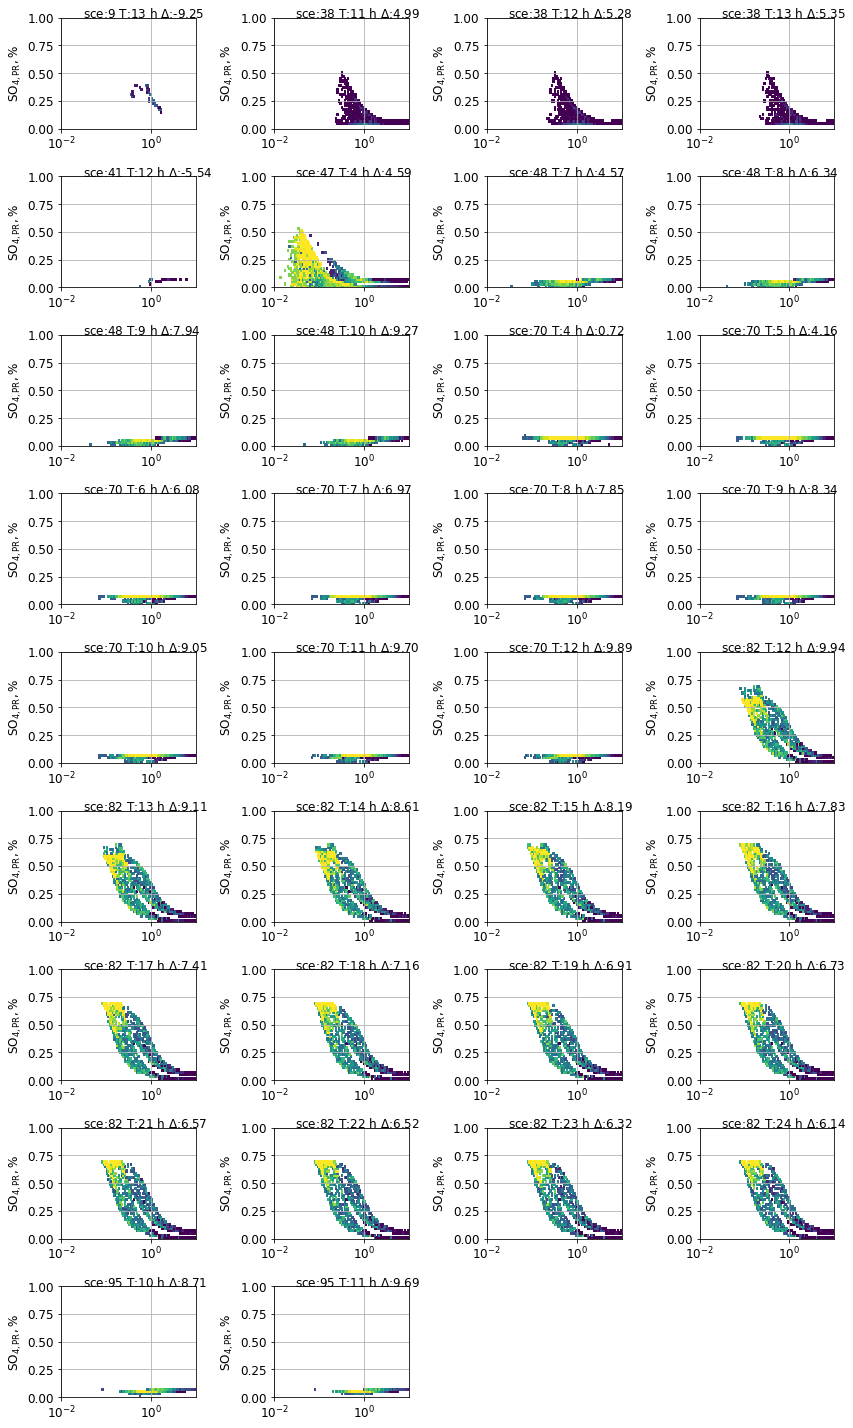

In [9]:
plt.figure(figsize=(12,20))
X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(34):
    plt.subplot(9,4,i+1)
    p = plt.pcolormesh(X, Y, so4_dist[0, sce_index[i],hour_index[i],:,:], 
                       norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    
    plt.xlim(1e-2,1e1)
    #plt.xlabel(r'Dry diameter $D_{\rm dry}$ / $\rm \mu m$')
    plt.xscale('log')

    plt.ylim(0,1)
    plt.ylabel(r'${\rm SO_{4,PR}}, \% $')
    plt.yscale('linear')
    plt.text(0.03, 1, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], hour_index[i], 
                                           error_2d[sce_index[i],hour_index[i]]*100))
    
    plt.grid(True)
    #cbar = plt.colorbar(p, format=mpl.ticker.LogFormatterMathtext(),orientation='vertical')
    #cbar.set_label(r'Number conc. n$(D_{\rm dry}$, $\gamma)$ / $\rm cm^{-3}$')

plt.tight_layout()
#plt.savefig('2D_no3_frac_CA.png')

## wi_dist

In [10]:
directory = 'sce_completed/scenarios'
wi_dist = np.zeros((2,100,25,50,180))
#scenarios/scenario_0038/out/urban_plume_00000021_process.nc
#Make plots
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("urban_plume_00000" in filename):
        #for i in range (34):
            #s = r'scenarios/' + 'scenario_' + str(sce_index[i]).zfill(4) + '/out' + r'/' + 'urban_plume_0000' + str(hour_index[i]).zfill(4) + '_process.nc'
            #if s in filename:
                #i = int(filename[-13:-11]) - 1
            t_index = int(filename[-13:-11]) - 1
            case_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            wi_dist[0, case_index, t_index,:,:] = ncf.variables["diam_wi_dist_pr"].data * 1e-6
            wi_dist[1, case_index, t_index,:,:] = ncf.variables["diam_wi_dist_avg"].data * 1e-6

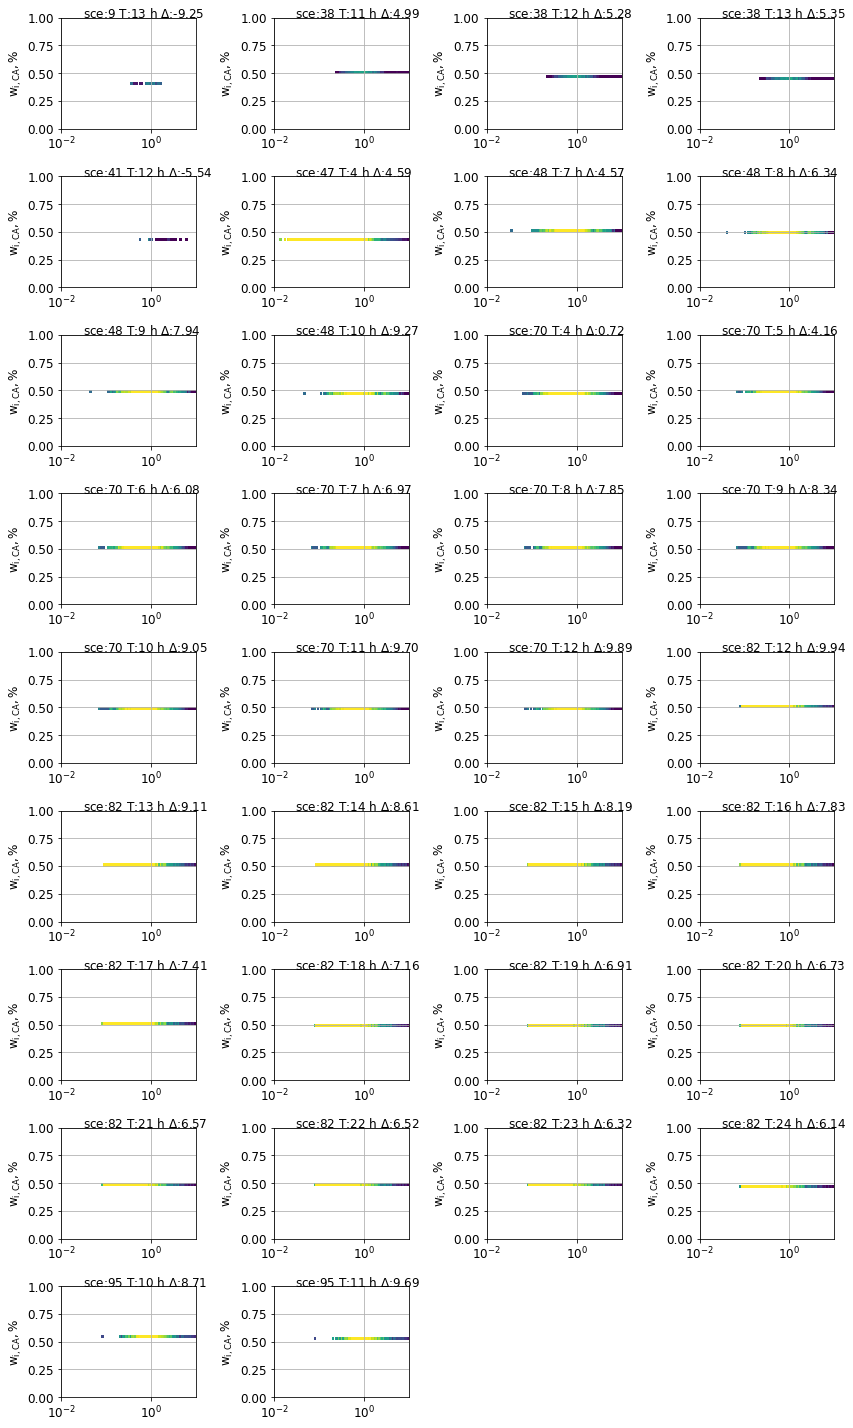

In [11]:
plt.figure(figsize=(12,20))
X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(34):
    plt.subplot(9,4,i+1)
    p = plt.pcolormesh(X, Y, wi_dist[1, sce_index[i],hour_index[i],:,:], 
                       norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    
    plt.xlim(1e-2,1e1)
    #plt.xlabel(r'Dry diameter $D_{\rm dry}$ / $\rm \mu m$')
    plt.xscale('log')

    plt.ylim(0,1)
    plt.ylabel(r'${\rm w_{i,CA}}, \% $')
    plt.yscale('linear')
    plt.text(0.03, 1, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], hour_index[i], 
                                           error_2d[sce_index[i],hour_index[i]]*100))
    
    plt.grid(True)
    #cbar = plt.colorbar(p, format=mpl.ticker.LogFormatterMathtext(),orientation='vertical')
    #cbar.set_label(r'Number conc. n$(D_{\rm dry}$, $\gamma)$ / $\rm cm^{-3}$')

plt.tight_layout()
#plt.savefig('2D_no3_frac_CA.png')

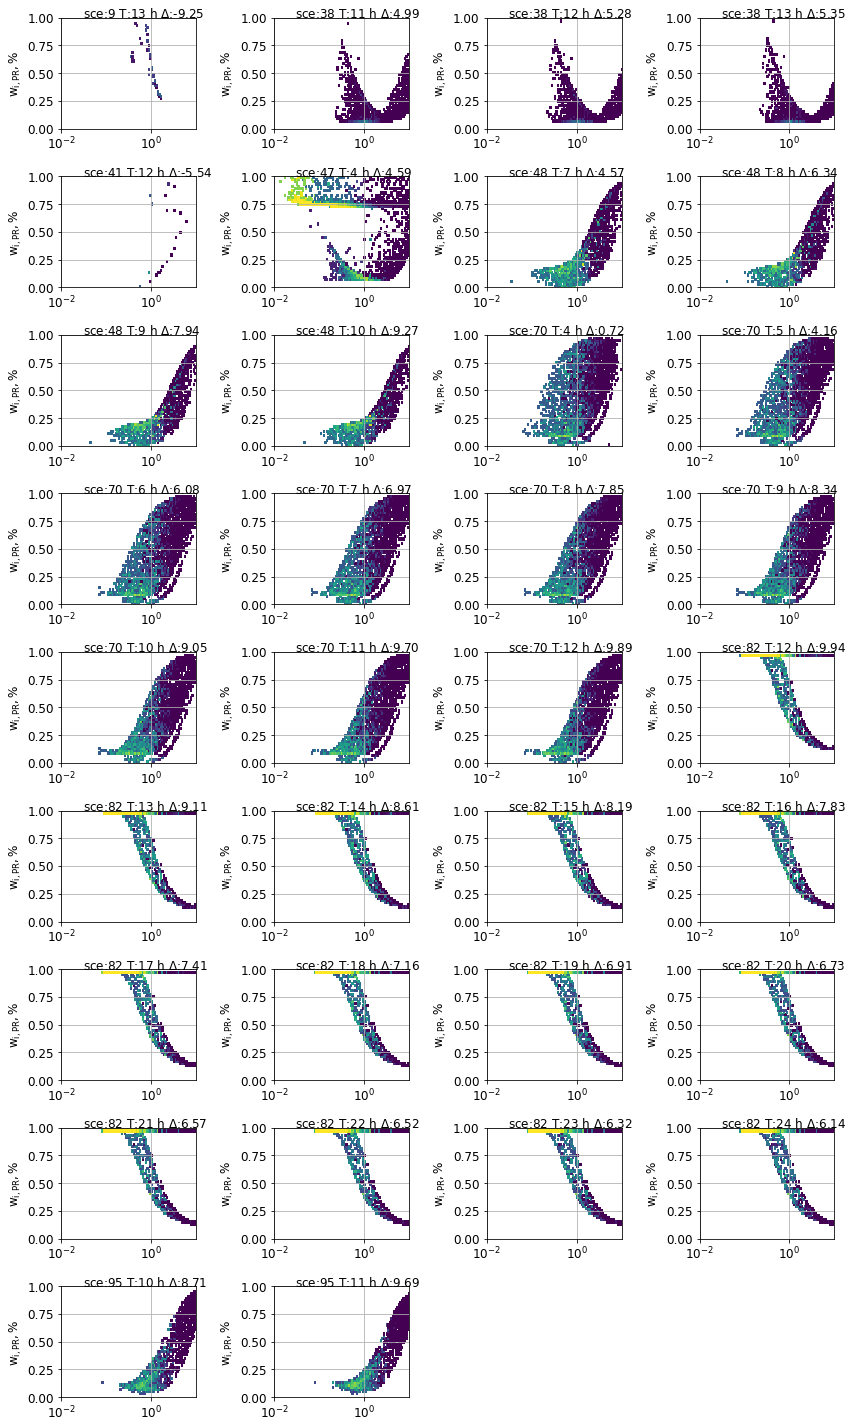

In [12]:
plt.figure(figsize=(12,20))
X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(34):
    plt.subplot(9,4,i+1)
    p = plt.pcolormesh(X, Y, wi_dist[0, sce_index[i],hour_index[i],:,:], 
                       norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    
    plt.xlim(1e-2,1e1)
    #plt.xlabel(r'Dry diameter $D_{\rm dry}$ / $\rm \mu m$')
    plt.xscale('log')

    plt.ylim(0,1)
    plt.ylabel(r'${\rm w_{i,PR}}, \% $')
    plt.yscale('linear')
    plt.text(0.03, 1, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], hour_index[i], 
                                           error_2d[sce_index[i],hour_index[i]]*100))
    
    plt.grid(True)
    #cbar = plt.colorbar(p, format=mpl.ticker.LogFormatterMathtext(),orientation='vertical')
    #cbar.set_label(r'Number conc. n$(D_{\rm dry}$, $\gamma)$ / $\rm cm^{-3}$')

plt.tight_layout()
#plt.savefig('2D_no3_frac_CA.png')